<a href="https://colab.research.google.com/github/mfarnas/bioinformatics/blob/main/anndata_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting started with anndata

**Authors:** [Adam Gayoso](https://twitter.com/adamgayoso), [Alex Wolf](https://twitter.com/falexwolf)

:::{note}
This tutorial is based on a blog posts by [Adam in 2021](https://adamgayoso.com/posts/ten_min_to_adata/) and [Alex in 2017](https://falexwolf.me/2017/introducing-anndata/).    
:::

In this tutorial, we introduce basic properties of the central object, [AnnData](http://anndata.readthedocs.io/en/latest/anndata.AnnData.html) ("Annotated Data").

`AnnData` is specifically designed for matrix-like data. By this we mean that we have $n$ observations, each of which can be represented as $d$-dimensional vectors, where each dimension corresponds to a variable or feature. Both the rows and columns of this $n \times d$ matrix are special in the sense that they are indexed.

For instance, in scRNA-seq data, each row corresponds to a cell with a barcode, and each column corresponds to a gene with a gene id. Furthermore, for each cell and each gene we might have additional metadata, like (1) donor information for each cell, or (2) alternative gene symbols for each gene. Finally, we might have other unstructured metadata like color palletes to use for plotting. Without going into every fancy Python-based data structure, we think that still today no other alternative really exists that:

* Handles sparsity
* Handles unstructured data
* Handles observation- and feature-level metadata
* Is user-friendly

In [7]:
!pip install anndata

import numpy as np
import pandas as pd
import anndata as ad
from scipy.sparse import csr_matrix
print(ad.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 4.2 MB/s eta 0:00:00
0.11.4


## Initializing AnnData

Let's start by building a basic AnnData object with some sparse count information, perhaps representing gene expression counts.

In [8]:
counts = csr_matrix(np.random.poisson(1, size=(100, 2000)), dtype=np.float32)
adata = ad.AnnData(counts)
adata

AnnData object with n_obs × n_vars = 100 × 2000

We see that AnnData provides a representation with summary stastics of the data The initial data we passed are accessible as a sparse matrix using `adata.X`.

In [9]:
adata.X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 127037 stored elements and shape (100, 2000)>

Now, we provide the index to both the `obs` and `var` axes using `.obs_names` (resp. `.var_names`).

In [10]:
adata.obs_names = [f"Cell_{i:d}" for i in range(adata.n_obs)]
adata.var_names = [f"Gene_{i:d}" for i in range(adata.n_vars)]
print(adata.obs_names[:10])

Index(['Cell_0', 'Cell_1', 'Cell_2', 'Cell_3', 'Cell_4', 'Cell_5', 'Cell_6',
       'Cell_7', 'Cell_8', 'Cell_9'],
      dtype='object')


In [11]:
adata.obs

""
Cell_0
Cell_1
Cell_2
Cell_3
Cell_4
...
Cell_95
Cell_96
Cell_97
Cell_98


In [12]:
adata.var

""
Gene_0
Gene_1
Gene_2
Gene_3
Gene_4
...
Gene_1995
Gene_1996
Gene_1997
Gene_1998


### Subsetting AnnData

These index values can be used to subset the AnnData, which provides a view of the AnnData object. We can imagine this to be useful to subset the AnnData to particular cell types or gene modules of interest. The rules for subsetting AnnData are quite similar to that of a Pandas DataFrame. You can use values in the `obs/var_names`, boolean masks, or cell index integers.

In [13]:
adata[["Cell_1", "Cell_10"], ["Gene_5", "Gene_1900"]]

View of AnnData object with n_obs × n_vars = 2 × 2

## Adding aligned metadata

### Observation/Variable level

So we have the core of our object and now we'd like to add metadata at both the observation and variable levels. This is pretty simple with AnnData, both `adata.obs` and `adata.var` are Pandas DataFrames.

In [14]:
ct = np.random.choice(["B", "T", "Monocyte"], size=(adata.n_obs,))
adata.obs["cell_type"] = pd.Categorical(ct)  # Categoricals are preferred for efficiency
adata.obs

,cell_type
Cell_0,B
Cell_1,Monocyte
Cell_2,Monocyte
Cell_3,T
Cell_4,T
...,...
Cell_95,Monocyte
Cell_96,Monocyte
Cell_97,Monocyte
Cell_98,T


We can also see now that the AnnData representation has been updated:

In [15]:
adata

AnnData object with n_obs × n_vars = 100 × 2000
    obs: 'cell_type'

### Subsetting using metadata

We can also subset the AnnData using these randomly generated cell types:

In [16]:
bdata = adata[adata.obs.cell_type == "B"]
bdata

View of AnnData object with n_obs × n_vars = 36 × 2000
    obs: 'cell_type'

## Observation/variable-level matrices

We might also have metadata at either level that has many dimensions to it, such as a UMAP embedding of the data. For this type of metadata, AnnData has the `.obsm/.varm` attributes. We use keys to identify the different matrices we insert. The restriction of `.obsm/.varm` are that `.obsm` matrices must length equal to the number of observations as `.n_obs` and `.varm` matrices must length equal to `.n_vars`. They can each independently have different number of dimensions.

Let's start with a randomly generated matrix that we can interpret as a UMAP embedding of the data we'd like to store, as well as some random gene-level metadata:

In [17]:
adata.obsm["X_umap"] = np.random.normal(0, 1, size=(adata.n_obs, 2))
adata.varm["gene_stuff"] = np.random.normal(0, 1, size=(adata.n_vars, 5))
adata.obsm

AxisArrays with keys: X_umap

Again, the AnnData representation is updated.

In [18]:
adata

AnnData object with n_obs × n_vars = 100 × 2000
    obs: 'cell_type'
    obsm: 'X_umap'
    varm: 'gene_stuff'

A few more notes about `.obsm/.varm`

1. The "array-like" metadata can originate from a Pandas DataFrame, scipy sparse matrix, or numpy dense array.
2. When using scanpy, their values (columns) are not easily plotted, where instead items from `.obs` are easily plotted on, e.g., UMAP plots.

In [19]:
adata.obsm["X_umap"]

array([[ 0.3176237 , -1.84533788],
       [-0.52038133,  0.74241925],
       [-0.29523044, -0.28992626],
       [-1.31788248,  0.31467562],
       [-0.2698881 , -0.65265095],
       [-0.94349731, -0.51069043],
       [-0.04301957,  2.27426924],
       [ 1.24274814,  1.50008995],
       [ 1.40764488,  0.65406005],
       [ 0.25260184, -1.08731725],
       [-0.31269906, -0.96876447],
       [ 0.75907056,  1.73953872],
       [ 0.62412777, -0.70571522],
       [-0.01392987, -0.23439789],
       [ 0.41814177, -1.04480624],
       [-1.27116996,  0.31411157],
       [-0.8898181 , -0.23837636],
       [-1.59232024, -0.2202612 ],
       [-1.48045566, -0.90368732],
       [-0.12572486,  0.48727107],
       [ 0.21601213, -0.87251567],
       [ 0.7516453 ,  2.65326082],
       [-0.38675588,  1.23228952],
       [ 1.44163868, -2.57307424],
       [-0.70911105, -0.3460091 ],
       [ 0.53592252,  0.56859748],
       [-1.84728572,  1.25897328],
       [ 0.74813332, -0.63013268],
       [ 0.4087428 ,

## Unstructured metadata

AnnData has `.uns`, which allows for any unstructured metadata. This can be anything, like a list or a dictionary with some general information that was useful in the analysis of our data.

In [20]:
adata.uns["random"] = [1, 2, 3]
adata.uns

OrderedDict([('random', [1, 2, 3])])

## Layers

Finally, we may have different forms of our original core data, perhaps one that is normalized and one that is not. These can be stored in different layers in AnnData. For example, let's log transform the original data and store it in a layer:

In [21]:
adata.layers["log_transformed"] = np.log1p(adata.X)
adata

AnnData object with n_obs × n_vars = 100 × 2000
    obs: 'cell_type'
    uns: 'random'
    obsm: 'X_umap'
    varm: 'gene_stuff'
    layers: 'log_transformed'

## Conversion to DataFrames

We can also ask AnnData to return us a DataFrame from one of the layers:

In [22]:
adata.to_df(layer="log_transformed")

,Gene_0,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5,Gene_6,Gene_7,Gene_8,Gene_9,...,Gene_1990,Gene_1991,Gene_1992,Gene_1993,Gene_1994,Gene_1995,Gene_1996,Gene_1997,Gene_1998,Gene_1999
Cell_0,0.000000,0.000000,0.000000,0.000000,1.098612,1.098612,0.693147,0.693147,0.000000,1.098612,...,0.693147,0.000000,0.000000,0.693147,0.000000,0.000000,1.386294,0.693147,0.693147,1.098612
Cell_1,0.000000,1.098612,1.386294,0.693147,0.693147,1.609438,0.000000,0.693147,0.000000,0.693147,...,0.693147,0.693147,0.693147,0.693147,0.693147,0.000000,0.693147,1.609438,0.000000,0.693147
Cell_2,0.693147,0.000000,1.386294,1.098612,1.098612,0.000000,0.000000,0.693147,0.000000,0.000000,...,0.693147,1.098612,0.693147,0.693147,0.000000,0.000000,0.000000,1.609438,1.386294,0.000000
Cell_3,1.098612,1.098612,1.098612,1.098612,1.098612,0.000000,0.000000,0.000000,1.791759,0.693147,...,0.693147,0.693147,0.693147,0.000000,1.098612,0.000000,0.000000,1.098612,0.693147,0.000000
Cell_4,1.386294,1.098612,1.098612,0.000000,1.098612,0.000000,0.693147,0.000000,0.693147,0.693147,...,0.693147,1.386294,0.693147,0.693147,0.693147,1.098612,1.098612,0.693147,0.693147,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cell_95,1.098612,0.693147,0.000000,0.693147,1.098612,0.000000,0.000000,0.000000,0.693147,1.609438,...,1.098612,0.000000,1.098612,0.000000,1.098612,1.098612,1.098612,1.098612,1.098612,0.693147
Cell_96,0.000000,0.000000,0.000000,1.098612,1.609438,1.098612,0.000000,1.609438,0.000000,0.693147,...,0.000000,0.000000,0.693147,1.098612,0.693147,0.693147,0.693147,0.000000,0.000000,1.098612
Cell_97,1.386294,0.693147,1.098612,1.098612,0.000000,0.000000,0.000000,0.000000,1.098612,0.693147,...,0.693147,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
Cell_98,1.609438,0.000000,0.693147,0.000000,1.098612,0.693147,0.693147,0.693147,0.000000,1.098612,...,0.000000,0.693147,0.693147,0.693147,1.609438,0.000000,1.098612,0.693147,0.000000,0.693147


In [23]:
adata.layers

Layers with keys: log_transformed

In [24]:
adata.obs

,cell_type
Cell_0,B
Cell_1,Monocyte
Cell_2,Monocyte
Cell_3,T
Cell_4,T
...,...
Cell_95,Monocyte
Cell_96,Monocyte
Cell_97,Monocyte
Cell_98,T


We see that the `.obs_names/.var_names` are used in the creation of this Pandas object.

## Writing the results to disk

`AnnData` comes with its own persistent HDF5-based file format: `h5ad`. If string columns with small number of categories aren't yet categoricals, `AnnData` will auto-transform to categoricals.

In [25]:
# to write/save
adata.write('my_results.h5ad', compression="gzip")

In [26]:
!ls

my_results.h5ad  sample_data


In [27]:
# to read
adata2 = ad.read_h5ad('my_results.h5ad')

In [28]:
!h5ls 'my_results.h5ad'

/bin/bash: line 1: h5ls: command not found


## Wrapping up the introduction

AnnData has become the standard for single-cell analysis in Python and for good reason -- it's straightforward to use and faciliatates more reproducible analyses with it's key-based storage. It's even becoming easier to convert to the popular R-based formats for single-cell analysis.

Keep reading on to better understand "views", on-disk backing, and other details.

## Views and copies

For the fun of it, let's look at another metadata use case. Imagine that the observations come from instruments characterizing 10 readouts in a multi-year study with samples taken from different subjects at different sites. We'd typically get that information in some format and then store it in a DataFrame:

In [29]:
obs_meta = pd.DataFrame({
        'time_yr': np.random.choice([0, 2, 4, 8], adata.n_obs),
        'subject_id': np.random.choice(['subject 1', 'subject 2', 'subject 4', 'subject 8'], adata.n_obs),
        'instrument_type': np.random.choice(['type a', 'type b'], adata.n_obs),
        'site': np.random.choice(['site x', 'site y'], adata.n_obs),
    },
    index=adata.obs.index,    # these are the same IDs of observations as above!
)

This is how we join the readout data with the metadata. Of course, the first argument of the following call for `X` could also just be a DataFrame.

In [30]:
adata = ad.AnnData(adata.X, obs=obs_meta, var=adata.var)

Now we again have a single data container that keeps track of everything.

In [31]:
print(adata)

AnnData object with n_obs × n_vars = 100 × 2000
    obs: 'time_yr', 'subject_id', 'instrument_type', 'site'


Subsetting the joint data matrix can be important to focus on subsets of variables or observations, or to define train-test splits for a machine learning model.

:::{note}
Similar to numpy arrays, AnnData objects can either hold actual data or reference another `AnnData` object. In the later case, they are referred to as "view".

Subsetting AnnData objects always returns views, which has two advantages:

- no new memory is allocated
- it is possible to modify the underlying AnnData object

You can get an actual AnnData object from a view by calling `.copy()` on the view. Usually, this is not necessary, as any modification of elements of a view (calling `.[]` on an attribute of the view) internally calls `.copy()` and makes the view an AnnData object that holds actual data. See the example below.
:::

In [32]:
adata

AnnData object with n_obs × n_vars = 100 × 2000
    obs: 'time_yr', 'subject_id', 'instrument_type', 'site'

Get access to the first 5 rows for two variables.

:::{note}
Indexing into AnnData will assume that integer arguments to `[]` behave like `.iloc` in pandas, whereas string arguments behave like `.loc`. `AnnData` always assumes string indices.
:::

In [33]:
adata[:5, ['Gene_1', 'Gene_3']]

View of AnnData object with n_obs × n_vars = 5 × 2
    obs: 'time_yr', 'subject_id', 'instrument_type', 'site'

This is a view! If we want an `AnnData` that holds the data in memory, let's call `.copy()`

In [34]:
adata_subset = adata[:5, ['Gene_1', 'Gene_3']].copy()

For a view, we can also set the first 3 elements of a column.

In [35]:
print(adata[:3, 'Gene_1'].X.toarray().tolist())
adata[:3, 'Gene_1'].X = [0, 0, 0]
print(adata[:3, 'Gene_1'].X.toarray().tolist())

[[0.0], [2.0], [0.0]]
[[0.0], [0.0], [0.0]]


<ipython-input-35-e4eeb71f6a79>:2: ImplicitModificationWarning: Modifying `X` on a view results in data being overridden
  adata[:3, 'Gene_1'].X = [0, 0, 0]


If you try to access parts of a view of an AnnData, the content will be auto-copied and a data-storing object will be generated.

In [36]:
adata_subset = adata[:3, ['Gene_1', 'Gene_2']]

In [37]:
adata_subset

View of AnnData object with n_obs × n_vars = 3 × 2
    obs: 'time_yr', 'subject_id', 'instrument_type', 'site'

In [38]:
adata_subset.obs['foo'] = range(3)

<ipython-input-38-81cf00566280>:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_subset.obs['foo'] = range(3)


Now `adata_subset` stores the actual data and is no longer just a reference to `adata`.

In [39]:
adata_subset

AnnData object with n_obs × n_vars = 3 × 2
    obs: 'time_yr', 'subject_id', 'instrument_type', 'site', 'foo'

Evidently, you can use all of pandas to slice with sequences or boolean indices.

In [40]:
adata[adata.obs.time_yr.isin([2, 4])].obs.head()

,time_yr,subject_id,instrument_type,site
Cell_1,2,subject 2,type a,site x
Cell_2,4,subject 1,type a,site y
Cell_3,2,subject 8,type b,site x
Cell_6,4,subject 8,type a,site y
Cell_7,4,subject 1,type a,site x


(read-partial)=

## Partial reading of large data

If a single `.h5ad` is very large, you can partially read it into memory by using backed mode:

In [41]:
adata = ad.read('my_results.h5ad', backed='r')

/usr/local/lib/python3.11/dist-packages/anndata/__init__.py:42: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [42]:
adata.isbacked

True

If you do this, you'll need to remember that the `AnnData` object has an open connection to the file used for reading:

In [43]:
adata.filename

PosixPath('my_results.h5ad')

As we're using it in read-only mode, we can't damage anything. To proceed with this tutorial, we still need to explicitly close it:

In [44]:
adata.file.close()

As usual, you should rather use `with` statements to avoid dangling open files (up-coming feature).

Manipulating the object on disk is possible, but experimental for sparse data. Hence, we leave it out of this tutorial.

# Exploring real datasets

Below are three datasets to be explored with anndata and scanpy. Try using the Colab Gemini assistant to help you explore this data making plots of statistics you might find interesting

In [45]:
!pip install scanpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 44.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [46]:
import os
import tempfile

import scanpy as sc
import seaborn as sns
import torch

In [47]:
adata = sc.read("./pbmc3k.h5ad", backup_url="http://falexwolf.de/data/pbmc3k_raw.h5ad")
adata

  0%|          | 0.00/5.58M [00:00<?, ?B/s]

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [48]:
adata_path="./lung_atlas.h5ad"
lung_adata = sc.read(
    adata_path,
    backup_url="https://figshare.com/ndownloader/files/24539942",
)
lung_adata

  0%|          | 0.00/972M [00:00<?, ?B/s]

AnnData object with n_obs × n_vars = 32472 × 15148
    obs: 'dataset', 'location', 'nGene', 'nUMI', 'patientGroup', 'percent.mito', 'protocol', 'sanger_type', 'size_factors', 'sampling_method', 'batch', 'cell_type', 'donor'
    layers: 'counts'

In [49]:
lung_adata.obs

,dataset,location,nGene,nUMI,patientGroup,percent.mito,protocol,sanger_type,size_factors,sampling_method,batch,cell_type,donor
index,,,,,,,,,,,,,
GAGGGGCCAGCC,Dropseq_transplant,Dropseq_lower,249,355,nan,0.019718,drop-seq,drop-seq,0.381231,Transplant,B1,Type 2,B1
ACATAGATAGGC,Dropseq_transplant,Dropseq_lower,582,987,nan,0.044580,drop-seq,drop-seq,1.081643,Transplant,B1,Type 2,B1
ATCGACGCGGCA,Dropseq_transplant,Dropseq_lower,292,490,nan,0.026531,drop-seq,drop-seq,0.497352,Transplant,B1,Type 2,B1
CCAGCTTAGGTT,Dropseq_transplant,Dropseq_lower,1057,1806,nan,0.035437,drop-seq,drop-seq,2.172617,Transplant,B1,Type 2,B1
TCATAGAGTCCT,Dropseq_transplant,Dropseq_lower,716,1378,nan,0.020319,drop-seq,drop-seq,1.197578,Transplant,B1,Type 2,B1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LungTranscriptome7239219_LungTranscriptome7239219GGGCATCCACCAACCG,10x_Transplant,Transplant,1178,3245,Parenchyma,0.011896,10x v2,other,0.775650,Transplant,5,Mast cell,5
LungTranscriptome7239219_LungTranscriptome7239219TGCTGCTAGCAATCTC,10x_Transplant,Transplant,1919,5984,Parenchyma,0.018747,10x v2,other,0.982236,Transplant,5,Mast cell,5
LungTranscriptome7239213_GACTGCGTCCTGCCAT,10x_Transplant,Transplant,4411,25233,Parenchyma,0.010489,10x v2,other,1.235763,Transplant,3,Mast cell,3


from matplotlib import pyplot as plt
_df_0['nGene'].plot(kind='hist', bins=20, title='nGene')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['nUMI'].plot(kind='hist', bins=20, title='nUMI')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['percent.mito'].plot(kind='hist', bins=20, title='percent.mito')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['size_factors'].plot(kind='hist', bins=20, title='size_factors')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='nGene', y='nUMI', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='nUMI', y='percent.mito', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='percent.mito', y='size_factors', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['nGene'].plot(kind='line', figsize=(8, 4), title='nGene')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['nUMI'].plot(kind='line', figsize=(8, 4), title='nUMI')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['percent.mito'].plot(kind='line', figsize=(8, 4), title='percent.mito')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['size_factors'].plot(kind='line', figsize=(8, 4), title='size_factors')
plt.gca().spines[['top', 'right']].set_visible(False)

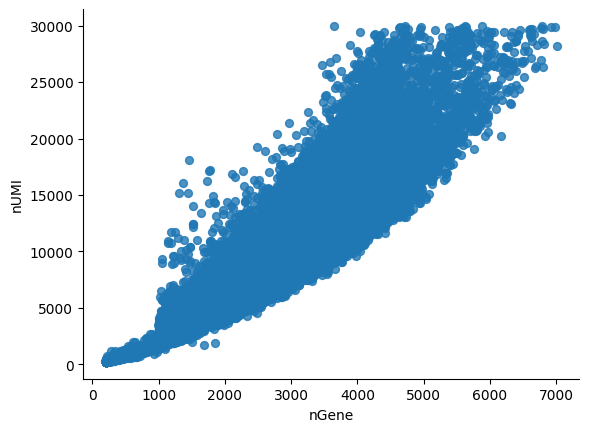

In [59]:
from matplotlib import pyplot as plt
lung_adata.obs.plot(kind='scatter', x='nGene', y='nUMI', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

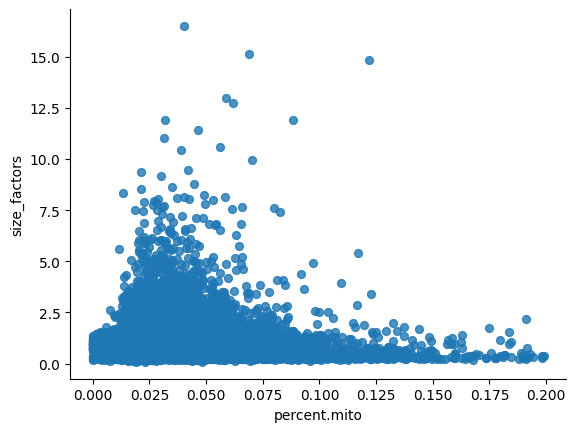

In [54]:
from matplotlib import pyplot as plt
lung_adata.obs.plot(kind='scatter', x='percent.mito', y='size_factors', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

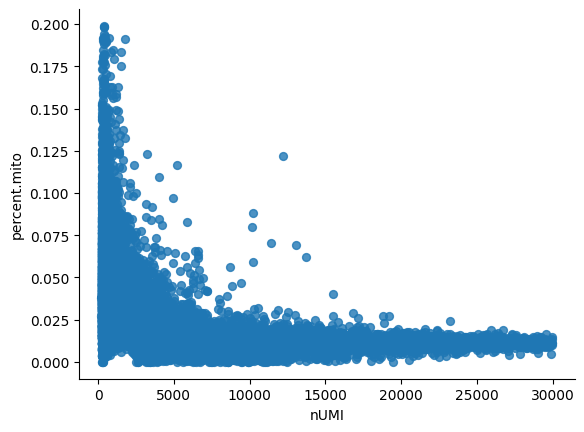

In [55]:
from matplotlib import pyplot as plt
lung_adata.obs.plot(kind='scatter', x='nUMI', y='percent.mito', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

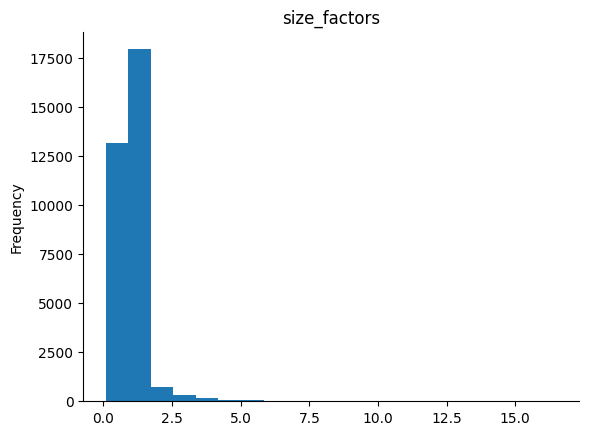

In [56]:
from matplotlib import pyplot as plt
lung_adata.obs['size_factors'].plot(kind='hist', bins=20, title='size_factors')
plt.gca().spines[['top', 'right',]].set_visible(False)

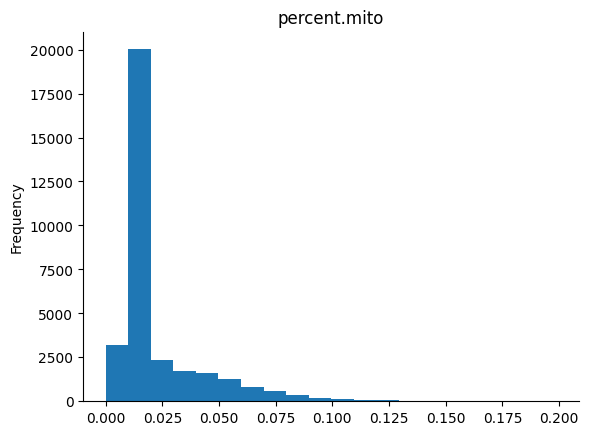

In [57]:
from matplotlib import pyplot as plt
lung_adata.obs['percent.mito'].plot(kind='hist', bins=20, title='percent.mito')
plt.gca().spines[['top', 'right',]].set_visible(False)

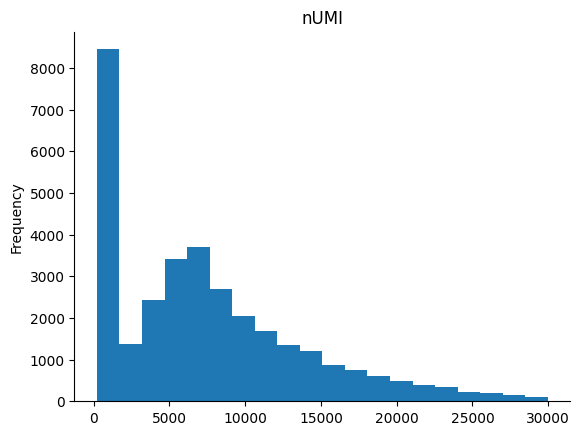

In [58]:
from matplotlib import pyplot as plt
lung_adata.obs['nUMI'].plot(kind='hist', bins=20, title='nUMI')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [60]:
pancreas_adata_path = "./pancreas.h5ad"

pancreas_adata = sc.read(
    pancreas_adata_path,
    backup_url="https://figshare.com/ndownloader/files/24539828",
)
pancreas_adata

  0%|          | 0.00/301M [00:00<?, ?B/s]

AnnData object with n_obs × n_vars = 16382 × 19093
    obs: 'tech', 'celltype', 'size_factors'
    layers: 'counts'

In [61]:
pancreas_adata.obs

,tech,celltype,size_factors
D101_5,celseq,gamma,0.028492
D101_43,celseq,gamma,0.079348
D101_93,celseq,gamma,0.037932
D102_4,celseq,gamma,0.047685
D172444_23,celseq,gamma,0.038683
...,...,...,...
Sample_1594,smarter,gamma,1.000000
Sample_1595,smarter,gamma,1.000000
Sample_1597,smarter,gamma,1.000000
Sample_1598,smarter,gamma,1.000000


from matplotlib import pyplot as plt
_df_11['size_factors'].plot(kind='hist', bins=20, title='size_factors')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['size_factors'].plot(kind='line', figsize=(8, 4), title='size_factors')
plt.gca().spines[['top', 'right']].set_visible(False)

In [62]:
adata_pbmc3k = sc.datasets.pbmc3k_processed()
adata_pbmc3k

  0%|          | 0.00/23.5M [00:00<?, ?B/s]

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [63]:
adata_pbmc3k.obs

,n_genes,percent_mito,n_counts,louvain
index,,,,
AAACATACAACCAC-1,781,0.030178,2419.0,CD4 T cells
AAACATTGAGCTAC-1,1352,0.037936,4903.0,B cells
AAACATTGATCAGC-1,1131,0.008897,3147.0,CD4 T cells
AAACCGTGCTTCCG-1,960,0.017431,2639.0,CD14+ Monocytes
AAACCGTGTATGCG-1,522,0.012245,980.0,NK cells
...,...,...,...,...
TTTCGAACTCTCAT-1,1155,0.021104,3459.0,CD14+ Monocytes
TTTCTACTGAGGCA-1,1227,0.009294,3443.0,B cells
TTTCTACTTCCTCG-1,622,0.021971,1684.0,B cells


from matplotlib import pyplot as plt
_df_13['n_genes'].plot(kind='hist', bins=20, title='n_genes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['percent_mito'].plot(kind='hist', bins=20, title='percent_mito')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['n_counts'].plot(kind='hist', bins=20, title='n_counts')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='n_genes', y='percent_mito', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='percent_mito', y='n_counts', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['n_genes'].plot(kind='line', figsize=(8, 4), title='n_genes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['percent_mito'].plot(kind='line', figsize=(8, 4), title='percent_mito')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_20['n_counts'].plot(kind='line', figsize=(8, 4), title='n_counts')
plt.gca().spines[['top', 'right']].set_visible(False)

In [64]:
## For more datasets, try loading one of these
sc.datasets.blobs    # Gaussian Blobs.
sc.datasets.ebi_expression_atlas    # Load a dataset from the EBI Single Cell Expression Atlas.
sc.datasets.krumsiek11    # Simulated myeloid progenitors [Krumsiek et al., 2011].
sc.datasets.moignard15    #hematopoiesis in early mouse embryos [Moignard et al., 2015].
sc.datasets.pbmc3k    #3k PBMCs from 10x Genomics.
sc.datasets.pbmc3k_processed    #Processed 3k PBMCs from 10x Genomics.
sc.datasets.pbmc68k_reduced    #Subsampled and processed 68k PBMCs.
sc.datasets.paul15    #Development of Myeloid Progenitors [Paul et al., 2015].
sc.datasets.toggleswitch    #Simulated toggleswitch.
sc.datasets.visium_sge    #Processed Visium Spatial Gene Expression data from 10x Genomics’ database.

<function scanpy.datasets._datasets.visium_sge(sample_id: 'VisiumSampleID' = 'V1_Breast_Cancer_Block_A_Section_1', *, include_hires_tiff: 'bool' = False) -> 'AnnData'>